# SemCodec Model Inference Test

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import audiocraft

/home/jongmin/.local/share/virtualenvs/audiocraft-ssbSDm-j/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.8.18 (you have 3.8.10)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [3]:
model = audiocraft.solvers.semcodec.SemCompressionSolver.model_from_checkpoint("/home/jongmin/userdata/audiocraft_jongmin/xps/fe8f770f/checkpoint.th", 'cuda')

Dora directory: /home/jongmin/userdata/audiocraft_jongmin
/home/jongmin/.local/share/virtualenvs/audiocraft-ssbSDm-j/lib/python3.8/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


## Paths
### a : Alexander Scriabin - Entragete, Op.63
### b : Claude Debussy - Estampes (Complete)
### c : Franz Liszt - Transcendental Etude No. 10 in F Minor
### d : Johann Sebastian Bach - Prelude and Fugue in D Major, WTC I, BWV 850
### e : Ludwig van Beethoven - Sonata No. 10 in G Major, Op. 14 No. 2, First Movement
### f : Sergei Rachmaninoff - Etude Tableau Op. 39 No. 5
### g : Wolfgang Amadeus Mozart - Rondo in A Minor,  K. 511

In [36]:
wav_appendix = '_32khz_mono.wav'
midi_appendix = '.midi'
full_piano_roll_appendix = '_full_pianoroll.pkl'
piano_roll_appendix = '_pianoroll.pkl'

path_a = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MID--AUDIO_11_R1_2009_11_R1_2009_07_WAV'
path_b = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2014/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO_09_R1_2014_wav--4'
path_c = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2013/ORIG-MIDI_01_7_7_13_Group__MID--AUDIO_13_R1_2013_wav--3'
path_d = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2011/MIDI-Unprocessed_18_R1_2011_MID--AUDIO_R1-D7_07_Track07_wav'
path_e = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2011/MIDI-Unprocessed_09_R1_2011_MID--AUDIO_R1-D3_13_Track13_wav'
path_f = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_17_R1_2018_wav--2'
path_g = '/home/jongmin/userdata/MAESTRO/maestro-v3.0.0/2011/MIDI-Unprocessed_05_R1_2011_MID--AUDIO_R1-D2_12_Track12_wav'

In [37]:
path_dict = {'a':path_a, 'b':path_b, 'c':path_c, 'd':path_d, 'e':path_e, 'f':path_f, 'g':path_g}

In [42]:
from datetime import datetime

In [98]:
out_path = '/home/jongmin/userdata/SemCodec/inference_test_results' + '/' + str(datetime.now())

In [46]:
import os

In [99]:
os.makedirs(out_path, exist_ok=True)

In [113]:
piano_roll

AttributeError: 'dict' object has no attribute 'shape'

## Forward Model

In [55]:
import torchaudio
import matplotlib.pyplot as plt

In [119]:
# i = 0
sr = 32000

In [120]:
for i in range(3):
    for key, path in path_dict.items():
        wav_path = path + wav_appendix
        piano_roll_path = path + piano_roll_appendix
        
        wav, _ = torchaudio.load(wav_path)
        wav = wav.to('cuda')
        piano_roll = torch.load(piano_roll_path)
        
        with torch.no_grad():
            out, pred_piano_roll = model.forward(wav[..., sr*30*i:sr*30*(i+1)].unsqueeze(0).cuda())
        
        os.makedirs(out_path + f'/{key}', exist_ok=True)

        torchaudio.save(out_path + f'/{key}/{key}_{i*30}_gt_audio.wav', wav[..., sr*30*i:sr*30*(i+1)].cpu(), sr)
        torchaudio.save(out_path + f'/{key}/{key}_{i*30}_out_audio.wav', out.x.cpu().detach().squeeze(0), sr)

        fig, ax = plt.subplots(2, 2, figsize=(40, 20))
        ax[0,0].imshow(piano_roll[i*30][0], aspect='auto', origin='lower', interpolation='none')
        ax[0,0].set_title('Ground Truth Onset')
        ax[0,1].imshow(pred_piano_roll[0,0].cpu().detach().numpy(), aspect='auto', origin='lower', interpolation='none')
        ax[0,1].set_title('Predicted Onset')
        ax[1,0].imshow(piano_roll[i*30][1], aspect='auto', origin='lower', interpolation='none')
        ax[1,0].set_title('Ground Truth Sustain')
        ax[1,1].imshow(pred_piano_roll[0,1].cpu().detach().numpy(), aspect='auto', origin='lower', interpolation='none')
        ax[1,1].set_title('Predicted Sustain')
        
        plt.savefig(out_path+f'/{key}/{key}_{i*30}_piano_roll_plots.png')
        plt.close()

# DEPRECATED TEST CODES

In [6]:
audio_a, sr = torchaudio.load(path_a + wav_appendix, normalize=True)

In [15]:
audio_a, sr = torchaudio.load(path_a + wav_appendix, normalize=True)
audio_b, sr = torchaudio.load(path_b + wav_appendix, normalize=True)
audio_c, sr = torchaudio.load(path_c + wav_appendix, normalize=True)
audio_d, sr = torchaudio.load(path_d + wav_appendix, normalize=True)
audio_e, sr = torchaudio.load(path_e + wav_appendix, normalize=True)

In [49]:
i = 0

In [7]:
a = model.forward(audio_a[..., sr*30*i:sr*30*(i+1)].unsqueeze(0).cuda())

In [52]:
os.makedirs(out_path + '/a', exist_ok=True)

In [86]:
torchaudio.save(out_path + f'/a/gt_{i}.wav', audio_a[..., sr*30*i:sr*30*(i+1)].cpu(), sr)

In [54]:
torchaudio.save(out_path + f'/a/out_{i}.wav', a[0].x.cpu().detach().squeeze(0), sr)

In [74]:
gt_pr = torch.load(path_a + piano_roll_appendix)

Text(0.5, 1.0, 'Predicted Sustain')

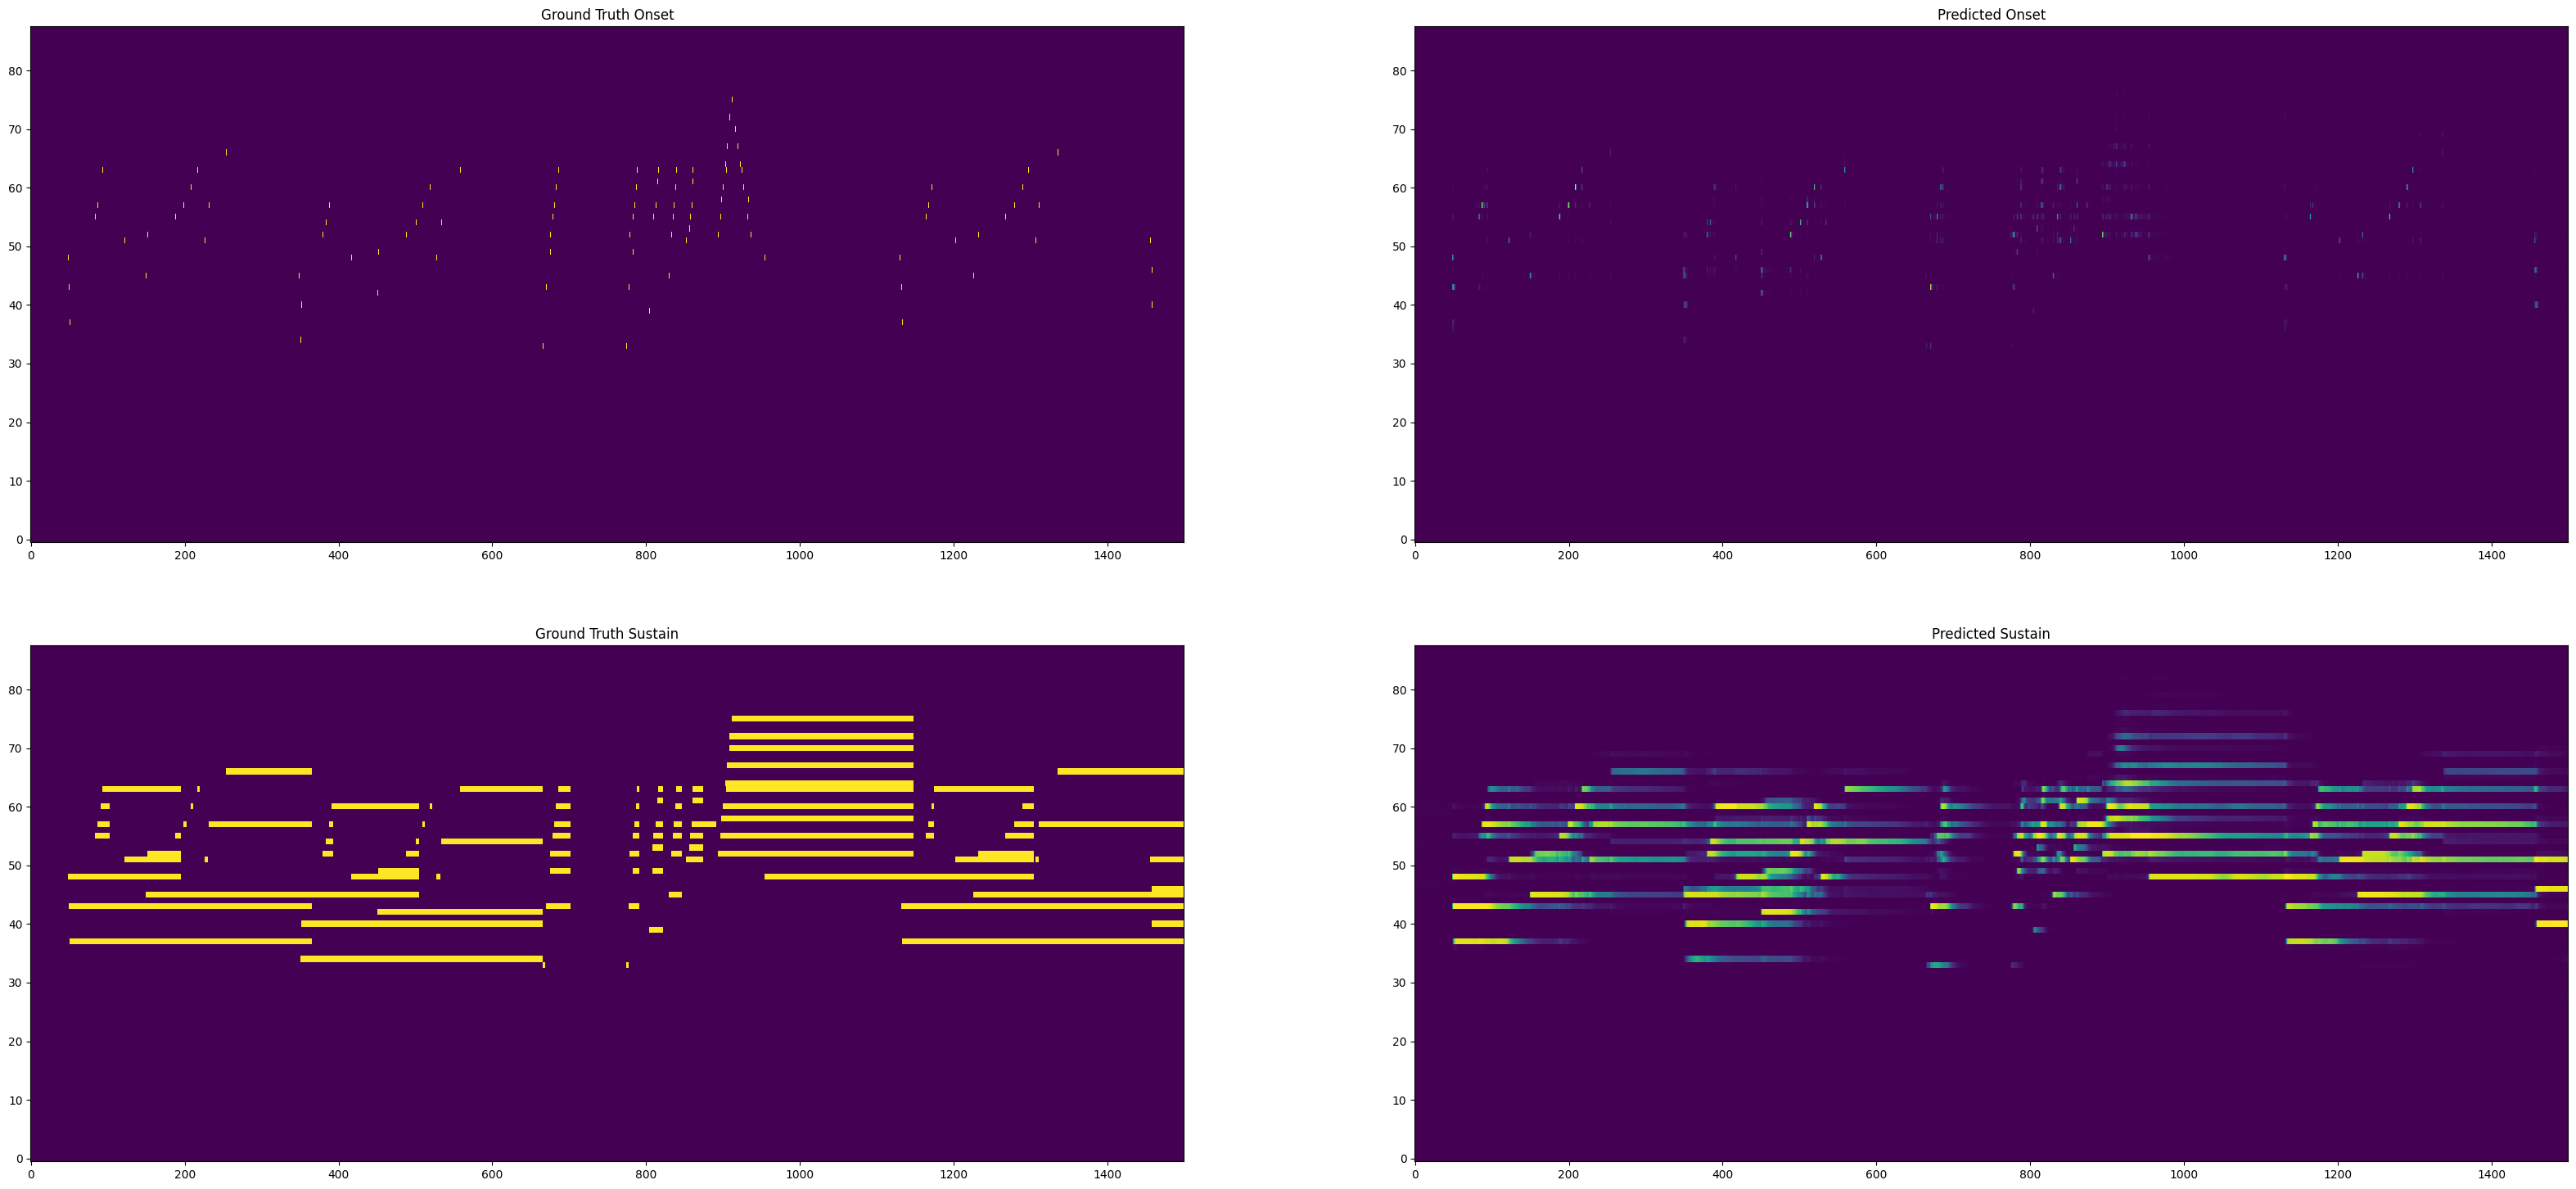

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(40, 20))
ax[0,0].imshow(gt_pr[0][0], aspect='auto', origin='lower', interpolation='none')
ax[0,0].set_title('Ground Truth Onset')
ax[0,1].imshow(a[1][0,0].cpu().detach().numpy(), aspect='auto', origin='lower', interpolation='none')
ax[0,1].set_title('Predicted Onset')
ax[1,0].imshow(gt_pr[0][1], aspect='auto', origin='lower', interpolation='none')
ax[1,0].set_title('Ground Truth Sustain')
ax[1,1].imshow(a[1][0,1].cpu().detach().numpy(), aspect='auto', origin='lower', interpolation='none')
ax[1,1].set_title('Predicted Sustain')

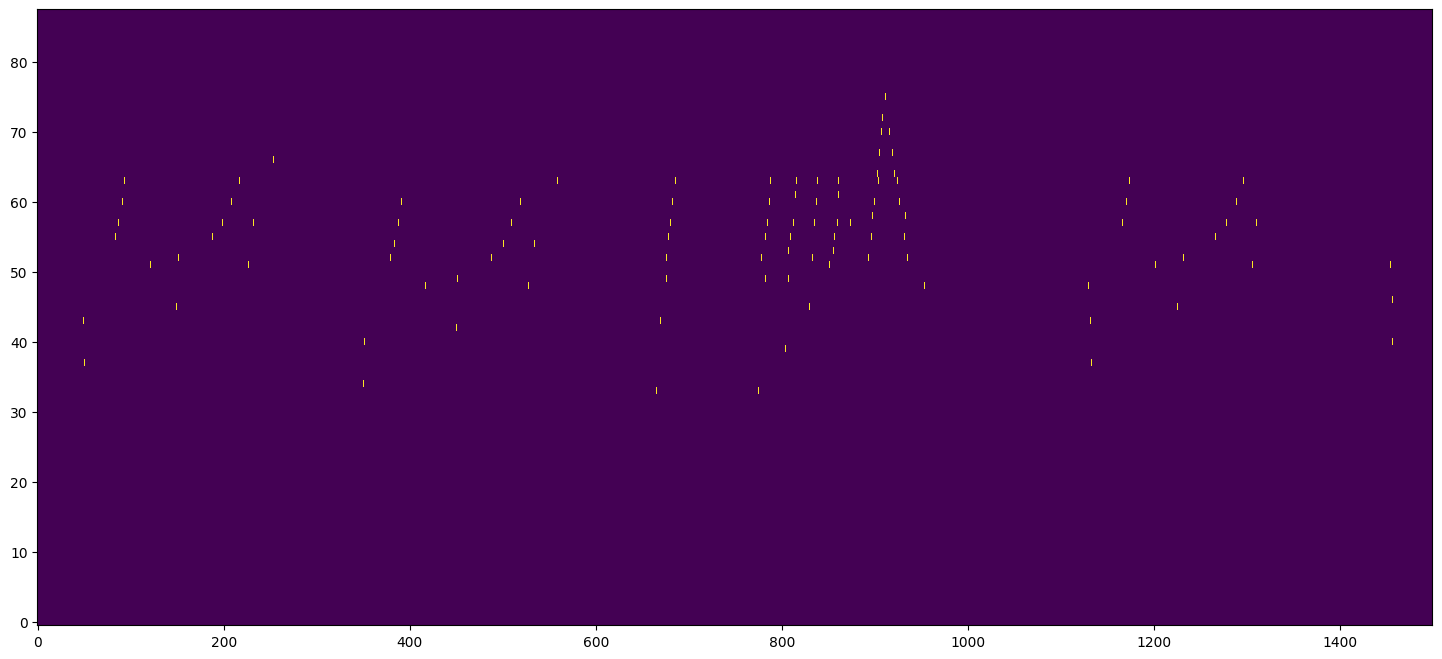

In [85]:
plt.figure(figsize=(18, 8))
plt.imshow(gt_pr[0][0], aspect='auto', origin='lower', interpolation='none')
plt.savefig(out_path + f'/a/onset_gt_{i}.png')

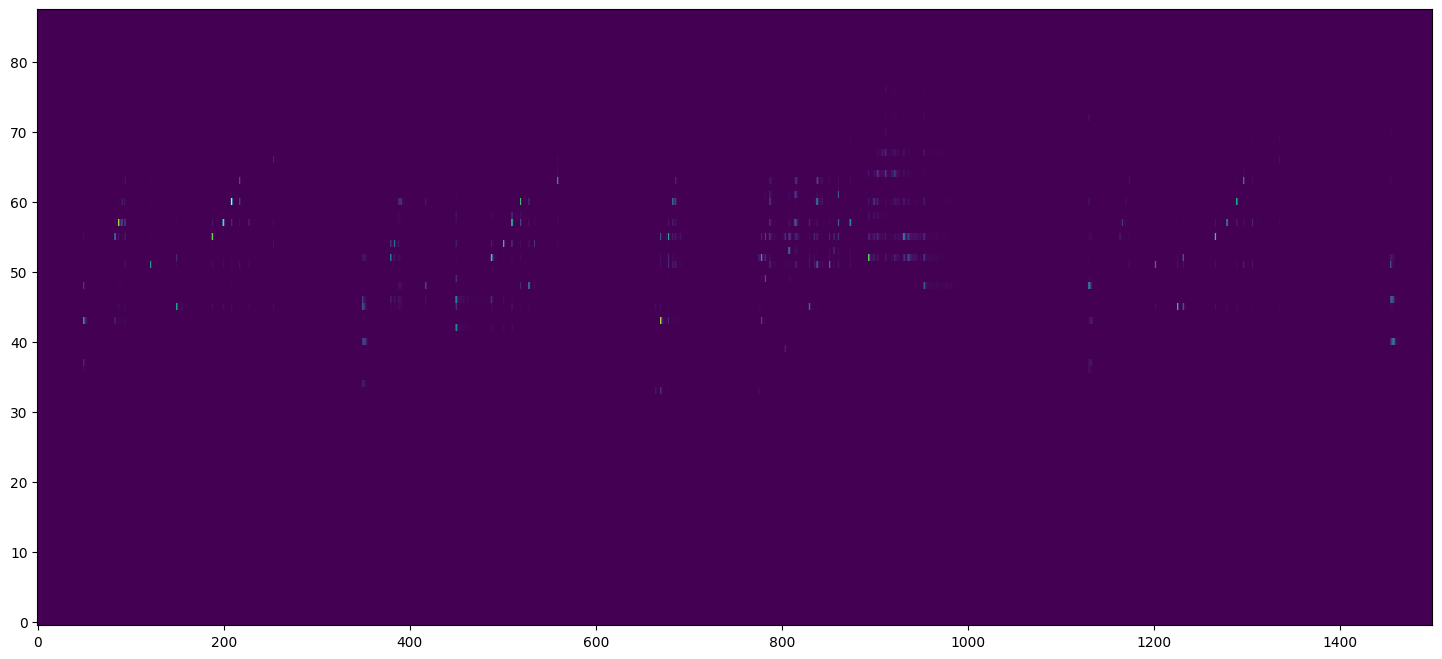

In [71]:
plt.figure(figsize=(18, 8))
plt.imshow(a[1][0,0].cpu().detach().numpy(), aspect='auto', origin='lower', interpolation='none')
plt.savefig(out_path + f'/a/onset_{i}.png')

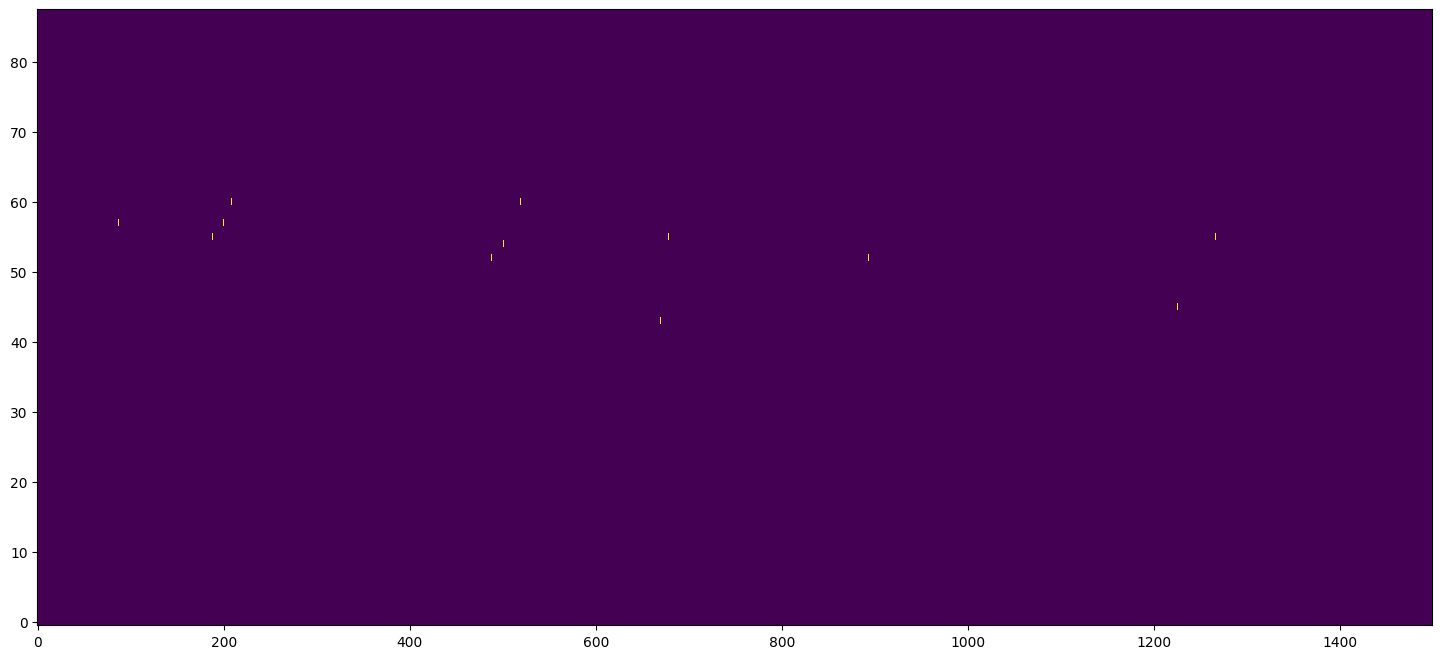

In [121]:
plt.figure(figsize=(18, 8))
plt.imshow((a[1][0,0].cpu() > 0.5 ).detach().numpy(), aspect='auto', origin='lower', interpolation='none')


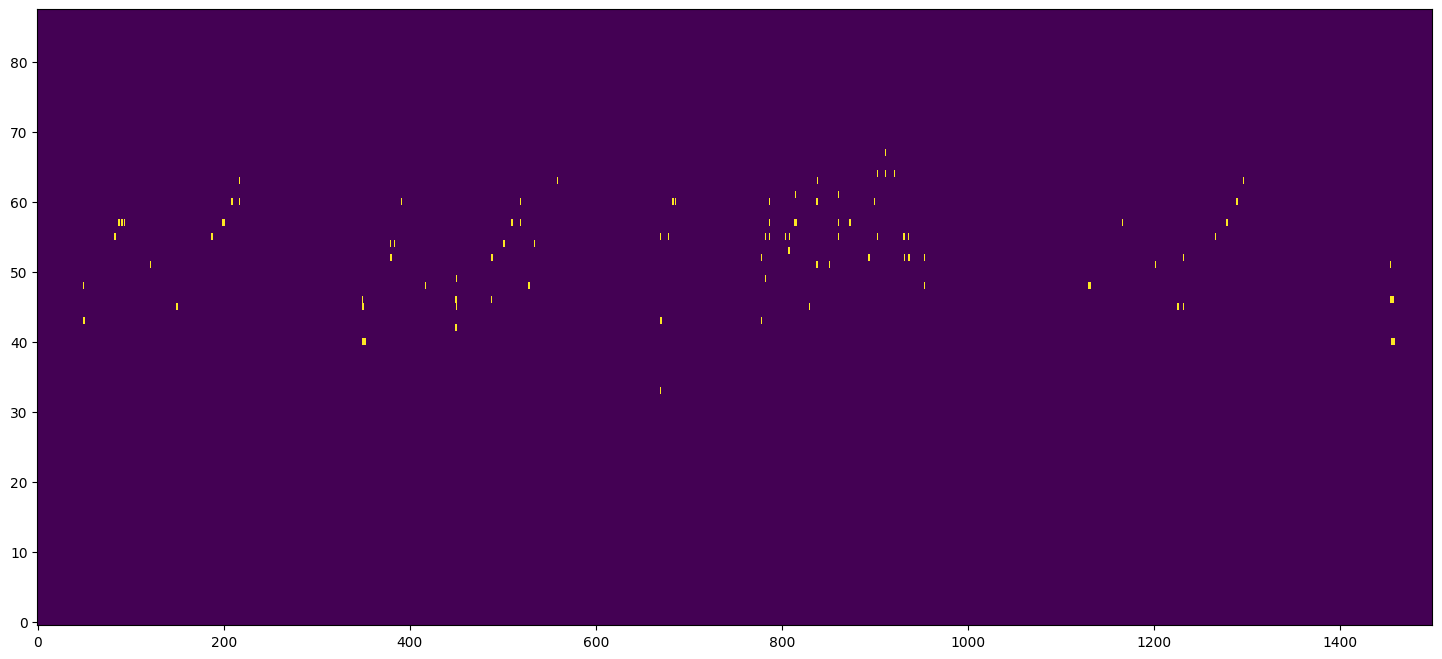

In [80]:
plt.figure(figsize=(18, 8))
plt.imshow((a[1][0,0].cpu() > 0.1 ).detach().numpy(), aspect='auto', origin='lower', interpolation='none')


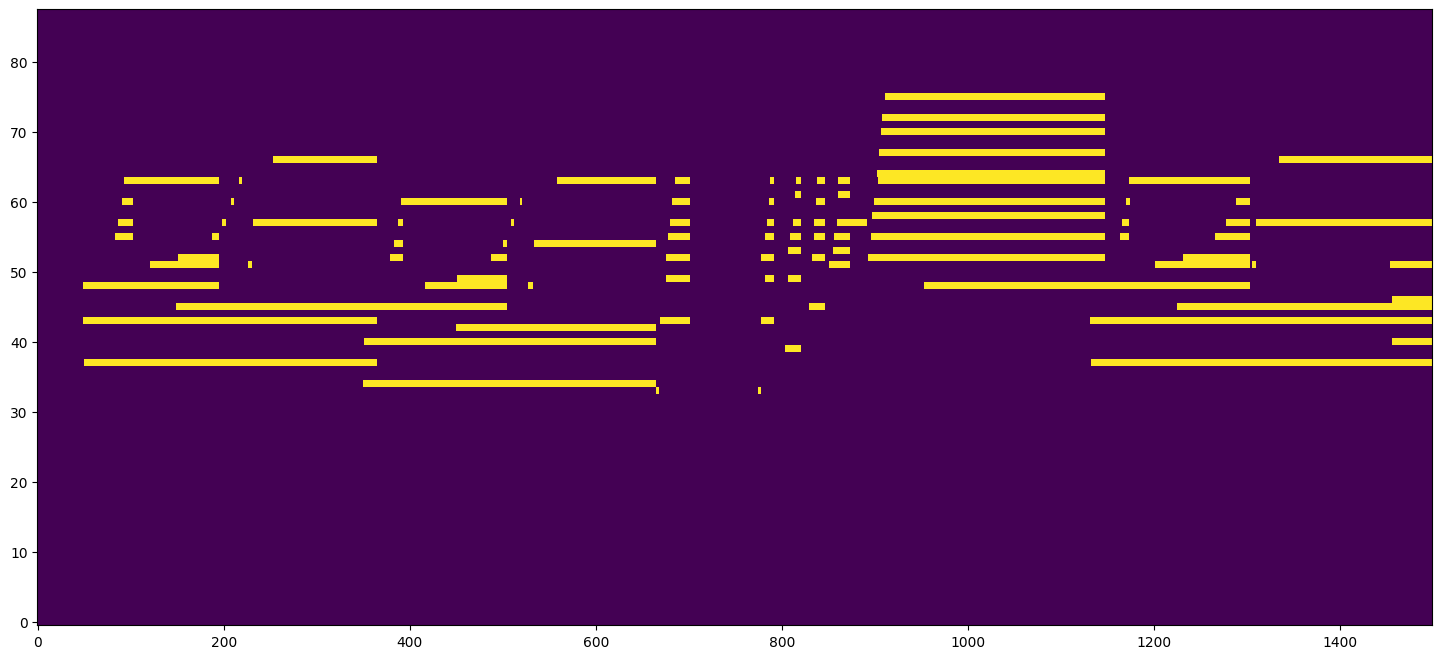

In [87]:
plt.figure(figsize=(18, 8))
plt.imshow(gt_pr[0][1], aspect='auto', origin='lower', interpolation='none')
plt.savefig(out_path + f'/a/sustain_gt_{i}.png')

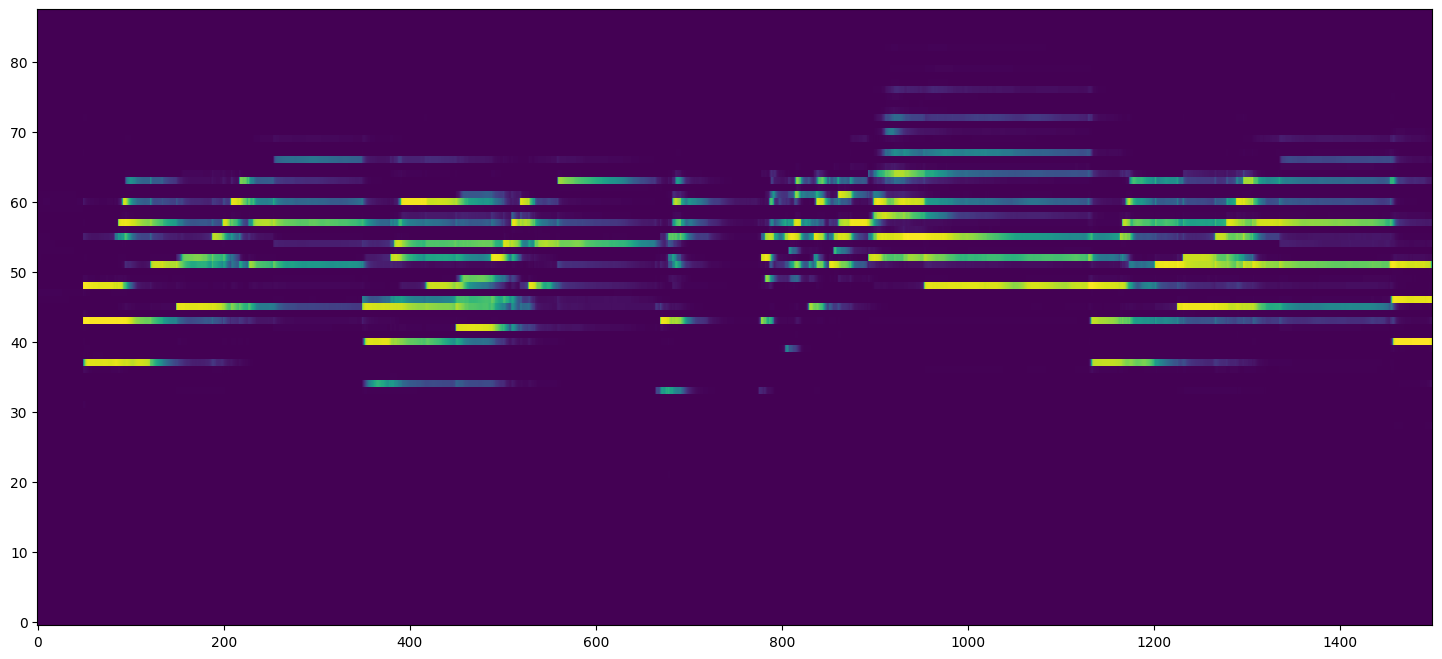

In [72]:
plt.figure(figsize=(18, 8))
plt.imshow(a[1][0,1].cpu().detach().numpy(), aspect='auto', origin='lower', interpolation='none')
plt.savefig(out_path + f'/a/sustain_{i}.png')

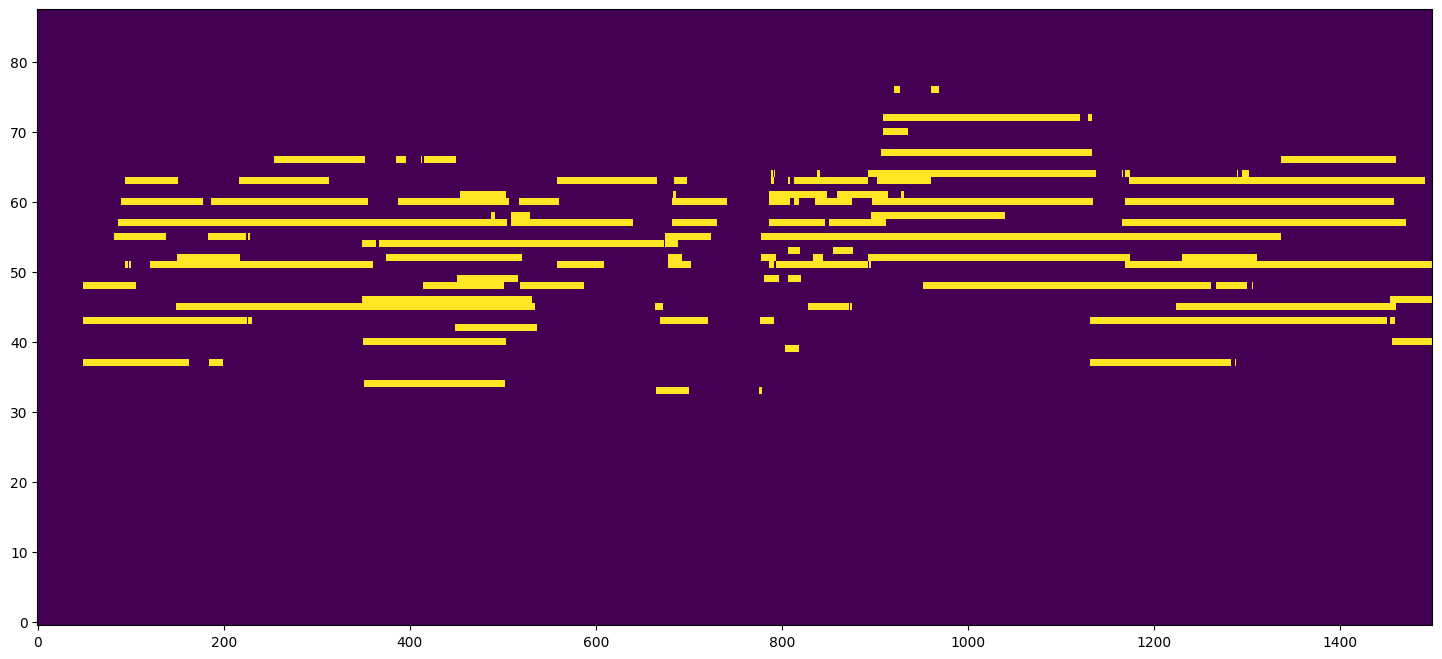

In [84]:
plt.figure(figsize=(18, 8))
plt.imshow((a[1][0,1].cpu() > 0.1).detach().numpy(), aspect='auto', origin='lower', interpolation='none')
plt.savefig(out_path + f'/a/sustain_{i}.png')